In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [140]:
os.getcwd()

'C:\\Users\\Vishaal\\Documents\\GitHub\\TREC_Distributed_Machine_Learning\\TREC\\10_Data\\20_Extracted Tweets\\10_2018 Train'

In [141]:
os.chdir('20_Extracted Tweets/10_2018 Train')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '20_Extracted Tweets/10_2018 Train'

In [142]:
df = pd.read_csv('Ultimate_Dataframe_TREC_2018_train.csv')

In [143]:
df.sample(5)

,Unnamed: 0,ID,Tweet,Event,Retweet_Count,Follower_Count,Source,User_Created_at,Tweet_Created_at,User_Language,User_Screen_Name,User_Location,Event_Decrption,Categories,Priority
1176,1176,324713976980189185,RT @SafeFamiliesDFW: Please join us in praying...,westTexasExplosion2013,6,862,"<a href=""http://twitter.com/download/iphone"" r...",Wed Dec 01 23:10:27 +0000 2010,Thu Apr 18 02:40:19 +0000 2013,en,SFFCnational,US | Canada | UK | Kenya,"On April 17, 2013, an ammonium nitrate explosi...",['Sentiment'],Low
859,859,396330685989797888,FAA - Report of no departures from #LAX until ...,laAirportShooting2013,0,250,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Mon Mar 23 17:11:07 +0000 2009,Fri Nov 01 17:39:33 +0000 2013,en,WakeCLT,"Denver, CO","On November 1, 2013, a shooting occurred at ar...",['ContextualInformation'],Low
322,322,212582216503533569,RT @SarahBisbing: #HighParkFire #ecosystems De...,fireColorado2012,1,2139,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Thu Feb 03 02:18:18 +0000 2011,Tue Jun 12 16:28:44 +0000 2012,en,jpwilloughby,A bunker in middle America,The 2012 Colorado wildfires were an unusually ...,['Discussion'],Low
705,705,379361337278988288,"Colorado flooding: Evacuations, broken oil pip...",floodColorado2013,12,274,"<a href=""http://twitter.com/download/iphone"" r...",Thu Aug 15 02:27:32 +0000 2013,Sun Sep 15 21:49:25 +0000 2013,en,Fraccident,NaN,The 2013 Colorado floods was a natural disaste...,['EmergingThreats'],High
48,48,243368881853431810,RT @karmonan: 7.9 earthquake hits costa rica,costaRicaEarthquake2012,1,15537,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Wed Jun 22 20:12:47 +0000 2011,Wed Sep 05 15:23:57 +0000 2012,en,monaessa1,NaN,The 2012 Costa Rica earthquake occurred at 08:...,['OriginalEvent'],Low


In [144]:
df.dtypes

Unnamed: 0           int64
ID                   int64
Tweet               object
Event               object
Retweet_Count        int64
Follower_Count       int64
Source              object
User_Created_at     object
Tweet_Created_at    object
User_Language       object
User_Screen_Name    object
User_Location       object
Event_Decrption     object
Categories          object
Priority            object
dtype: object

In [145]:
df.shape

(1333, 15)

In [146]:
'''
    Converting cols to datetime data type
'''
df['User_Created_at'] = df['User_Created_at'].astype('datetime64')
df['Tweet_Created_at'] = df['Tweet_Created_at'].astype('datetime64')

In [110]:
'''
    Converting cols to str data type
'''
df['Source'] = df['Source'].astype('str')
df['Event'] = df['Event'].astype('str')

In [111]:
'''
    Source (device iphone, andorid etc) and user_location have Nans
'''
df.isna().any()

Unnamed: 0          False
ID                  False
Tweet               False
Event               False
Retweet_Count       False
Follower_Count      False
Source              False
User_Created_at     False
Tweet_Created_at    False
User_Language       False
User_Screen_Name    False
User_Location        True
Event_Decrption     False
Categories          False
Priority            False
dtype: bool

In [147]:
'''
    We seem to have tweets from 2012, 13
'''
df['Tweet_Created_at'].dt.year.unique()

array([2012, 2013], dtype=int64)

In [148]:
df['Tweet_Created_at'].dt.month_name().apply(lambda x:x).value_counts()

September    482
June         263
December     239
April        184
November     165
Name: Tweet_Created_at, dtype: int64

In [149]:
'''
    Both March and Sep have no emergency tweets according to our data
'''
month = ['Apr','Jun','Sep', 'Nov', 'Dec']
month_ct = [184, 263, 482, 165, 239]

Text(0.5, 1.0, 'Tweets by Month of the Year')

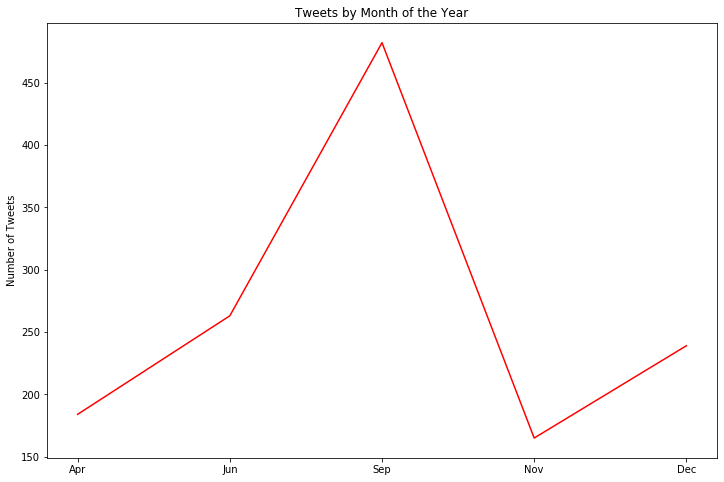

In [150]:
plt.figure(figsize=(12,8))
plt.plot(month, month_ct, 'r')
plt.ylabel('Number of Tweets')
plt.title('Tweets by Month of the Year')

In [151]:
df['Tweet_Created_at'].dt.weekday_name.apply(lambda x:x).value_counts()

Thursday     345
Sunday       215
Friday       204
Wednesday    202
Monday       169
Tuesday      165
Saturday      33
Name: Tweet_Created_at, dtype: int64

In [152]:
'''
    Most tweets from weekend and monday
'''
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_ct = [169, 165, 202, 345, 204, 33, 215]

Text(0.5, 1.0, 'Tweets by Day of the Week')

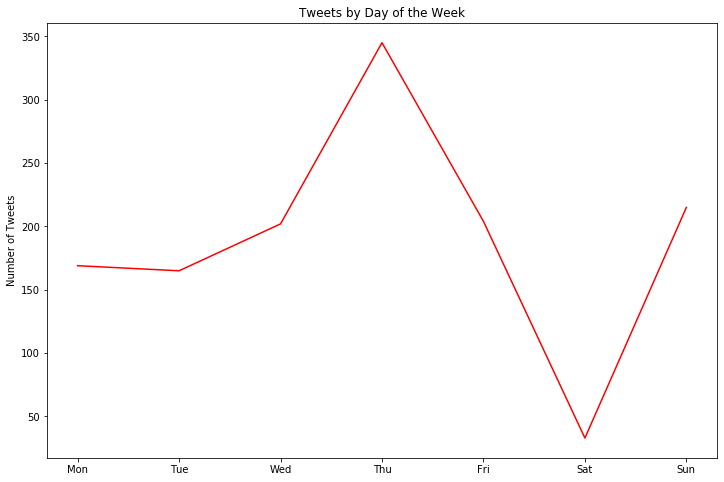

In [153]:
plt.figure(figsize=(12,8))
plt.plot(day, day_ct, 'r')
plt.ylabel('Number of Tweets')
plt.title('Tweets by Day of the Week')

In [154]:
s_dayct = df['Tweet_Created_at'].dt.day.apply(lambda x:x).value_counts()
s_dayct = s_dayct.sort_index()

Text(0.5, 0, 'Day of the Month')

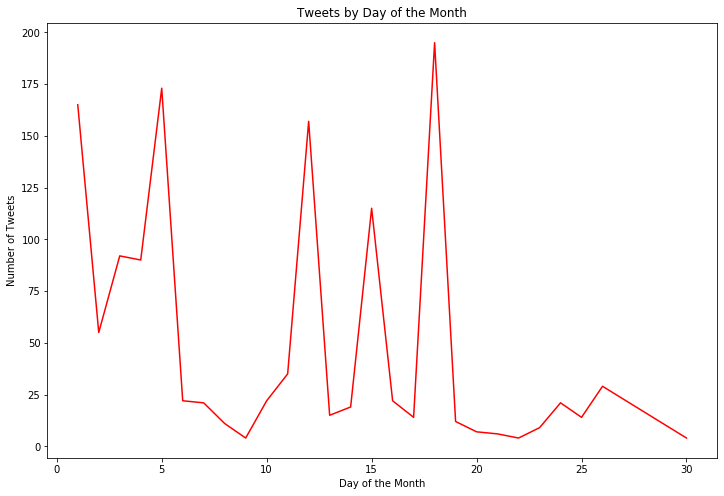

In [155]:
'''
    Not much of an insight from this data but we can see three distinct peaks
'''
plt.figure(figsize=(12,8))
plt.plot(s_dayct.index, s_dayct, 'r')
plt.ylabel('Number of Tweets')
plt.title('Tweets by Day of the Month')
plt.xlabel('Day of the Month')

In [156]:
s_hourct = df['Tweet_Created_at'].dt.hour.apply(lambda x:x).value_counts()
s_hourct = s_hourct.sort_index()

Text(0.5, 0, 'Hour of the Day')

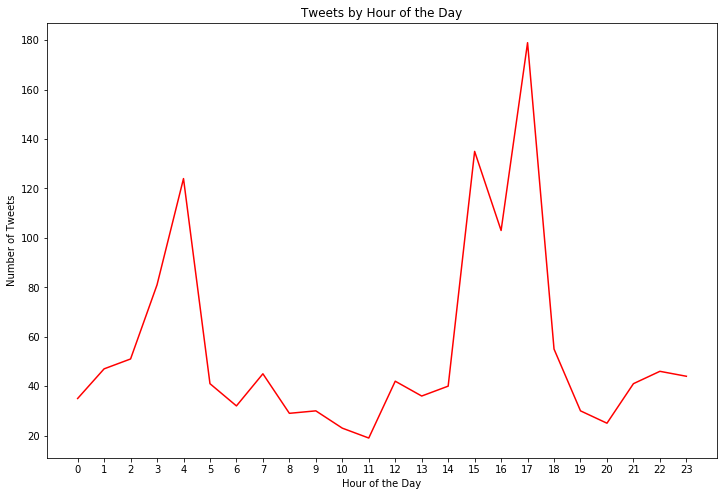

In [157]:
'''
    Huge average influx of tweets at 7 AM
'''
plt.figure(figsize=(12,8))
plt.plot(s_hourct.index, s_hourct, 'r')
plt.ylabel('Number of Tweets')
plt.xticks(np.arange(0,24))
plt.title('Tweets by Hour of the Day')
plt.xlabel('Hour of the Day')

In [158]:
s_priority = df['Priority'].apply(lambda x:x).value_counts()
s_priority

Low         814
Medium      324
High        185
Critical      9
Unknown       1
Name: Priority, dtype: int64

Text(0.5, 1.0, 'Count of Tweets by Priority')

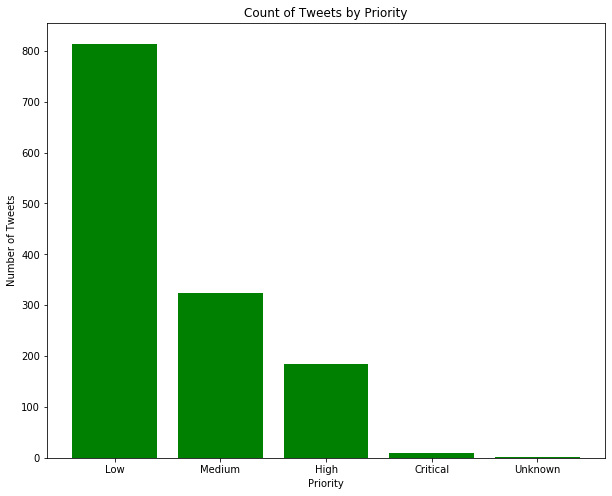

In [159]:
'''
    As predicted most tweets are of low prioity. Critical tweets are far and few. Unbalanced.
'''
plt.figure(figsize=(10,8))
plt.bar(s_priority.index, s_priority, color = 'g')
plt.xlabel('Priority')
plt.ylabel('Number of Tweets')
plt.title('Count of Tweets by Priority')

In [160]:
'''
    We try to get the count of each type of decvice used to tweet. Not sure how it will be useful yet but
    I guess good to know.
    
    By far, the webclient, iphones and androids are the most popular. It also has to be noted that we have some
    tweets from non-twitter sources like Facebook and some other random websites.
    
    Tweet Deck is dashboard application by twitter to manage multiple twitter accounts.
'''
s_twc = df['Source'].str.contains('Twitter Web Client').apply(lambda x:x).value_counts()
s_tweetdeck = df['Source'].str.contains('TweetDeck').apply(lambda x:x).value_counts()
s_tw = df['Source'].str.contains('Twitter for Websites').apply(lambda x:x).value_counts()
s_tf = df['Source'].str.contains('twitterfeed').apply(lambda x:x).value_counts()
s_iphone = df['Source'].str.contains('Twitter for iPhone').apply(lambda x:x).value_counts()
s_android = df['Source'].str.contains('Twitter for Android').apply(lambda x:x).value_counts()
s_ipad = df['Source'].str.contains('Twitter for iPad').apply(lambda x:x).value_counts()
s_bb = df['Source'].str.contains('Twitter for BlackBerry').apply(lambda x:x).value_counts()
s_f = df['Source'].str.contains('Facebook').apply(lambda x:x).value_counts()

s_tw

False    1294
True       39
Name: Source, dtype: int64

In [161]:
source_type = ['Web Client', 'iPhone', 'Android', 'Twitter Feed', 'Facebook', 'Tweet Deck','iPad', 'BlackBerry', 'Websites']
source_count = [s_twc[1], s_iphone[1], s_android[1], s_tf[1], s_f[1], s_tweetdeck[1], s_ipad[1], s_bb[1], s_tw[1]]

Text(0.5, 1.0, 'Tweets Collected by Source')

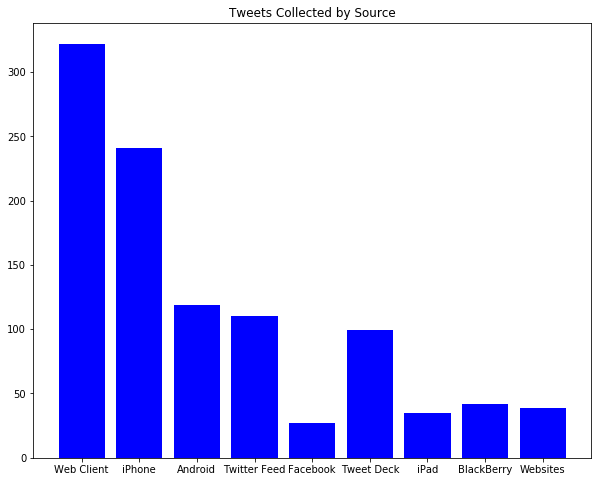

In [162]:
plt.figure(figsize=(10,8))
plt.bar(source_type, source_count, color = 'blue')
plt.title('Tweets Collected by Source')

In [163]:
'''
    We shall now look at the tweet counts by type of disaster. Attacks, bombings and school shootings are considered 
    separately despite having some commonalities in the nature of the disaster. 
    
    Most of the tweets are from earthquakes and the least are from tornadoes.
'''

event_type = ['flood', 'Earthquake', 'fire', 'Explosion', 'Shooting', 'typhoon' ]
event_count = {}
for element in event_type:
    counts = df['Event'].str.contains(element).apply(lambda x:x).value_counts()
    print(counts)
    event_count[element] = counts[1]

event_count = sorted(event_count.items(), key=lambda kv: kv[1], reverse = True)
keys = []
val = []
for element in event_count:
    keys.append(element[0])
    val.append(element[1])
    

False    1098
True      235
Name: Event, dtype: int64
False    1086
True      247
Name: Event, dtype: int64
False    1070
True      263
Name: Event, dtype: int64
False    1149
True      184
Name: Event, dtype: int64
False    1172
True      161
Name: Event, dtype: int64
False    1090
True      243
Name: Event, dtype: int64


Text(0.5, 1.0, 'Tweets Collected by Disaster Type')

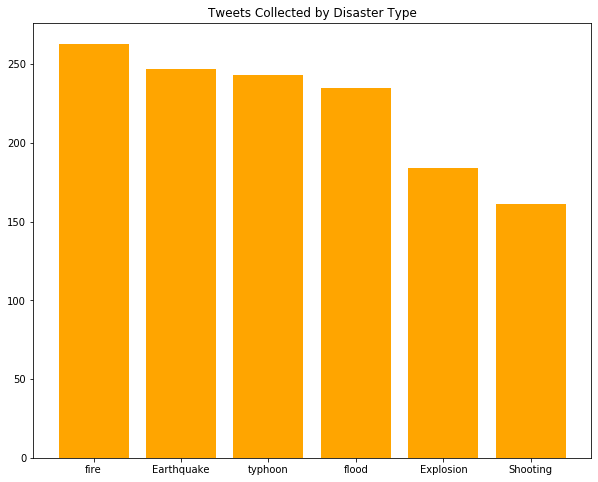

In [164]:
plt.figure(figsize=(10,8))
plt.bar(keys, val, color = 'orange')
plt.title('Tweets Collected by Disaster Type')

In [165]:
new_df = df[df['Event'].str.contains('Earthquake')]

In [166]:
'''
    Writing each type of disaster as a new csv file for feature extraction
'''
for element in event_type:
    new_df = df[df['Event'].str.contains(element)]
    new_df.to_csv(element+'_TREC_2018_train.csv')

In [167]:
a = np.array(df['Tweet'][df['Priority'] == 'Critical'])
len(a)

9

In [168]:
event_type = ['flood', 'Earthquake', 'fire', 'typhoon', 'Explosion''Shooting']
l = {}
for element in event_type:
    df_1 = df[((df['Priority'] == 'Critical') ) & ((df['Event'].str.contains(element)))]
    l[element] = df_1.shape[0]
    
l = sorted(l.items(), key=lambda kv: kv[1], reverse = True)
key = []
values = []
for element in l:
    key.append(element[0])
    values.append(element[1])
    

Text(0.5, 1.0, 'Critical Tweets by Disaster Type Train - 2018')

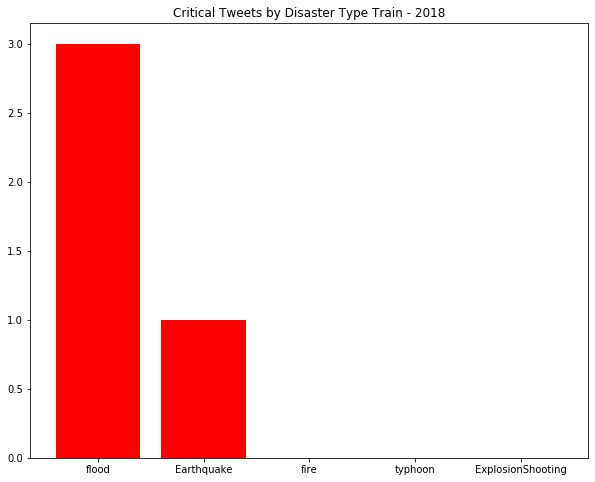

In [169]:
plt.figure(figsize=(10,8))
plt.bar(key, values, color = 'red')
plt.title('Critical Tweets by Disaster Type Train - 2018')

In [138]:
df['Event'].unique()

array(['costaRicaEarthquake2012', 'fireColorado2012', 'floodColorado2013',
       'laAirportShooting2013', 'typhoonPablo2012',
       'westTexasExplosion2013'], dtype=object)

In [171]:
df[df['Priority']=='Unknown']


,Unnamed: 0,ID,Tweet,Event,Retweet_Count,Follower_Count,Source,User_Created_at,Tweet_Created_at,User_Language,User_Screen_Name,User_Location,Event_Decrption,Categories,Priority
302,302,212311994286620672,RT @CBSDenver: The copter is on the way to the...,fireColorado2012,2,393,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2012-05-31 23:38:51,2012-06-11 22:34:58,en,HitchGreen,"Boulder, Colorado",The 2012 Colorado wildfires were an unusually ...,['MultimediaShare'],Unknown


,Unnamed: 0,ID,Tweet,Event,Retweet_Count,Follower_Count,Source,User_Created_at,Tweet_Created_at,User_Language,User_Screen_Name,User_Location,Event_Decrption,Categories,Priority
302,302,212311994286620672,RT @CBSDenver: The copter is on the way to the...,fireColorado2012,2,393,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2012-05-31 23:38:51,2012-06-11 22:34:58,en,HitchGreen,"Boulder, Colorado",The 2012 Colorado wildfires were an unusually ...,['MultimediaShare'],Unknown
